# Lab 3_1

## A toy 2-d data set for decision trees and boosting. Obtain the data set data1.txt from the course webpage. Each line has a two-d data point followed by a label (0 or 1).

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas import read_csv
from matplotlib.pyplot import figure
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier

In [2]:
data = read_csv('data1.txt', header = None, sep = ' ')
inputs = data.values[:, 0:2]
labels = data.values[:, -1]

## (a) Plot this data to see what it looks like.

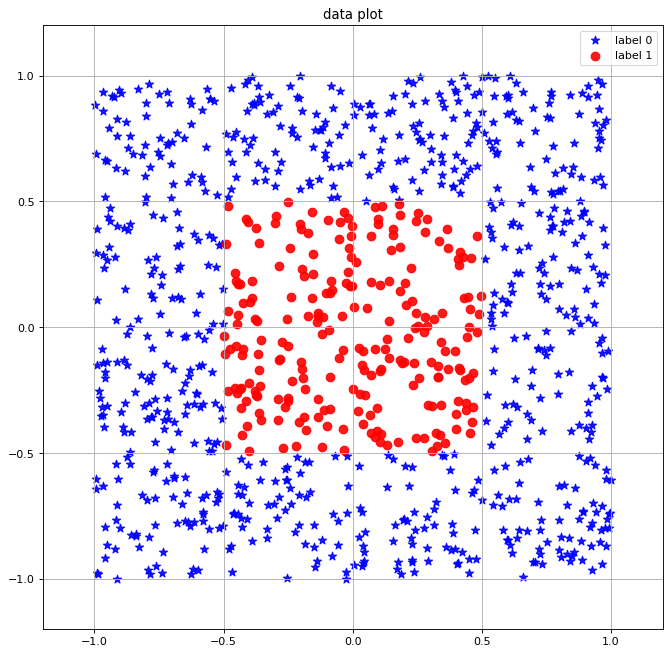

In [3]:
figure(figsize = (10, 10), dpi = 80)

plt.title('data plot')

plt.scatter(*inputs[:,[0,1]][labels==0].T, s = 60, alpha = 0.9, color = 'blue', marker = '*', label = 'label 0')
plt.scatter(*inputs[:,[0,1]][labels==1].T, s = 60, alpha = 0.9, color = 'red', marker = 'o', label = 'label 1')

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

plt.legend()
plt.grid()
plt.show()

## (b) Now use sklearn.tree.DecisionTreeClassifier to fit a decision tree to the data. What stopping criterion did you use? Display the tree using graphviz.

Stopping criteria is gini


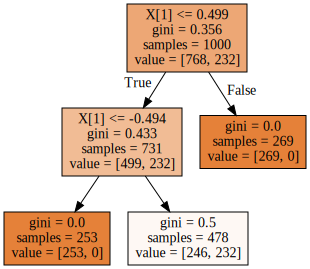

In [4]:
clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth = 2)
clf.fit(inputs, labels)
print('Stopping criteria is gini')
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                max_depth = 2,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Stopping criteria is gini


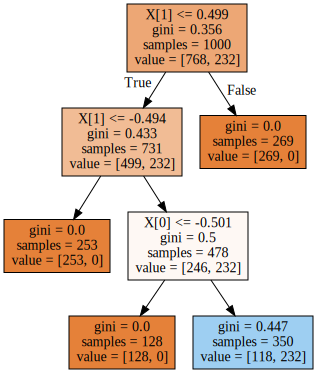

In [5]:
clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth = 3)
clf.fit(inputs, labels)
print('Stopping criteria is gini')
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                max_depth = 3,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Stopping criteria is gini


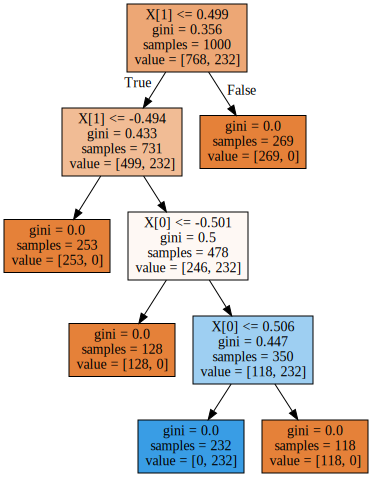

In [6]:
clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth = None)
clf.fit(inputs, labels)
print('Stopping criteria is gini')
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                max_depth = None, # If None, the tree is fully generated.
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## (c) Finally, fit boosted decision stumps to this data using sklearn.ensemble.AdaBoostClassifier. Use a relatively small number of stumps, and display each of them. Give a table showing how accuracy on the training data improves as each successive stump is added.

In [7]:
stumps = []
accuracy = []
for i in range(1, 11):
    clf = AdaBoostClassifier(n_estimators=i, random_state=0)
    clf.fit(inputs, labels)
    acc = clf.score(inputs, labels)
    stumps.append(i)
    accuracy.append(acc)
    print("stumps = ", i, "\naccuracy = ", acc)

stumps =  1 
accuracy =  0.768
stumps =  2 
accuracy =  0.768
stumps =  3 
accuracy =  0.882
stumps =  4 
accuracy =  1.0
stumps =  5 
accuracy =  1.0
stumps =  6 
accuracy =  1.0
stumps =  7 
accuracy =  1.0
stumps =  8 
accuracy =  1.0
stumps =  9 
accuracy =  1.0
stumps =  10 
accuracy =  1.0


In [8]:
df_1 = pd.DataFrame(data = stumps, columns = ['stump'])
df_2 = pd.DataFrame(data = accuracy, columns = ['accuracy'])
df = df_1.merge(df_2, how = 'left', left_index=True, right_index=True)
df

,stump,accuracy
0,1,0.768
1,2,0.768
2,3,0.882
3,4,1.000
4,5,1.000
5,6,1.000
6,7,1.000
7,8,1.000
8,9,1.000
9,10,1.000
